# THE SPARKS FOUNDATION

# TASK #4

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

# Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import pydotplus
from IPython.display import Image 
from sklearn.tree import export_graphviz

# Loading the Dataset and analysing it


In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Label Encoding Species column and spliting the dataset into features and labels

In [4]:
y=df["Species"]
le=LabelEncoder()
y=le.fit_transform(y)
df=df.drop(columns=["Species","Id"])

In [5]:
X=df

In [6]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Splitting the data into training and testing data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.20, random_state=42)

# Decision Tree Classifier

In [8]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Accuracy

In [9]:
dtc.score(X_test,y_test)

1.0

# Confusion Matrix

In [10]:
y_predict=dtc.predict(X_test)


In [11]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Classification Report

In [12]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
#pip install pydotplus
#pip install graphviz
#conda install graphviz

In [14]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# Visualizing the decision tree

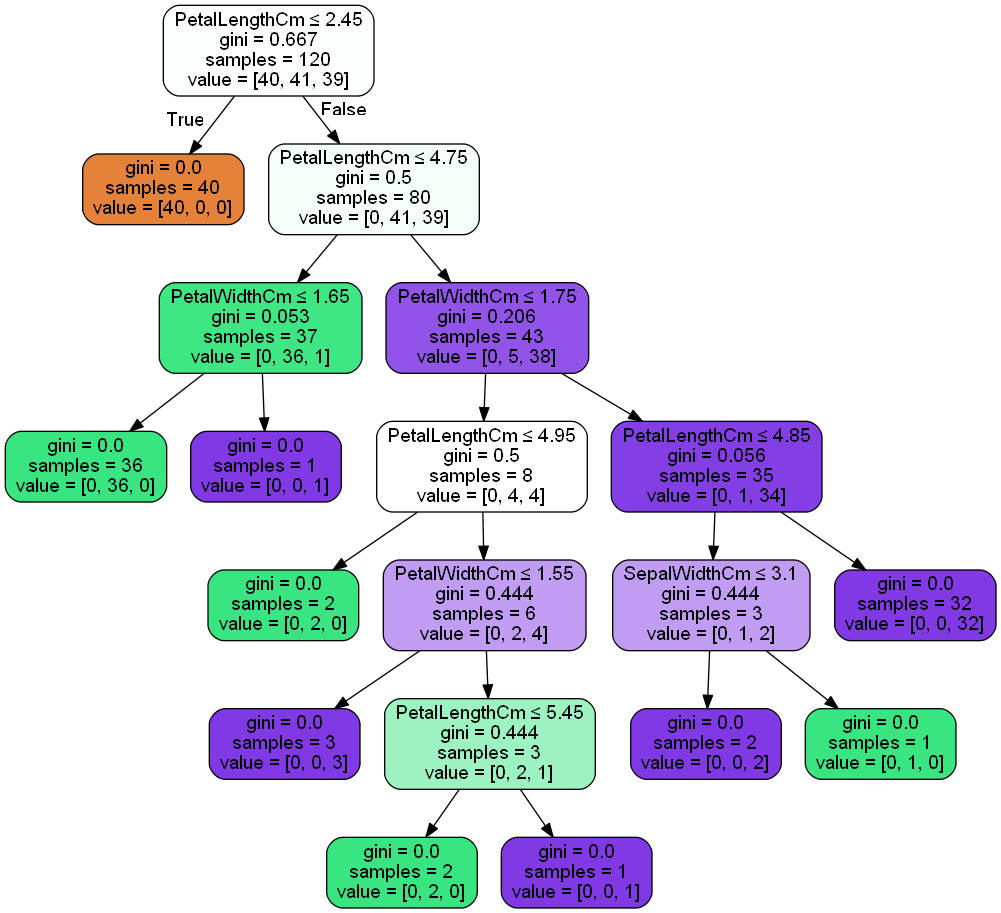

In [15]:
dc_graph=export_graphviz(dtc,feature_names=df.columns,filled=True,special_characters=True ,rounded=True)
dc_graph = pydotplus.graph_from_dot_data(dc_graph)
Image(dc_graph.create_png())